In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.spatial import KDTree

In [2]:
# Custom code to load .list files
import stuff

In [3]:
stars, galaxies = stuff.parse_stuff_list('/home/aalvarez/Work/Data/sim09/sim09.list')

We have now the baseline. We train a KDTree with their coordinates, so we can cross-reference

In [4]:
star_coords = np.stack([stars.ra, stars.dec]).T
galaxy_coords = np.stack([galaxies.ra, galaxies.dec]).T
all_coords = np.append(star_coords, galaxy_coords, axis=0)

In [5]:
kdtree = KDTree(all_coords)

### Load the run with and without variable PSF

In [6]:
variable_catalog = Table.read('/home/aalvarez/Work/Projects/sextractorxx/tests/sim09_vpsf/sexpp.out.fits')
constant_catalog = Table.read('/home/aalvarez/Work/Projects/sextractorxx/tests/sim09/sexpp.out.fits')

### Plot an histogram of the distance to the closest match
The best model correspond to that one with more closer to some reference entry

In [7]:
def get_closest_distances(catalog):
    dist = []
    for e in catalog:
        dist.append(kdtree.query([e['smf_alpha'], e['smf_delta']], 1)[0])
    return dist

In [8]:
variable_closest = get_closest_distances(variable_catalog)
constant_closest = get_closest_distances(constant_catalog)

<IPython.core.display.Javascript object>


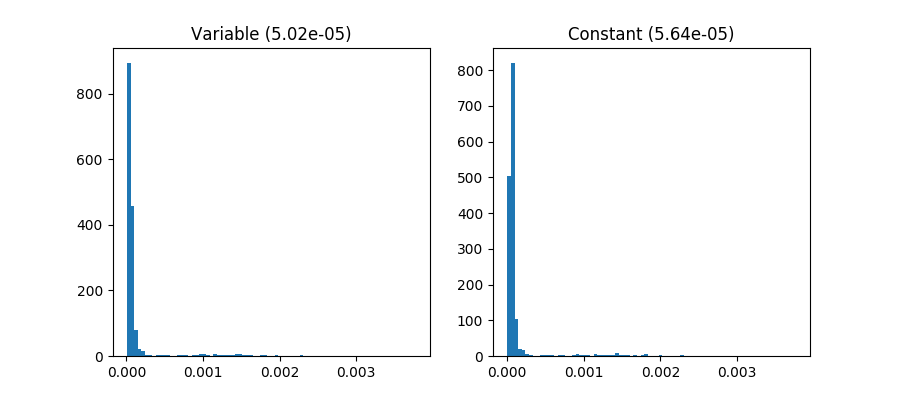

Text(0.5,1,'Constant (5.64e-05)')

In [9]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.hist(variable_closest, 80)
plt.title('Variable ({:.2e})'.format(np.median(variable_closest)))

plt.subplot(1, 2, 2)
plt.hist(constant_closest, 80)
plt.title('Constant ({:.2e})'.format(np.median(constant_closest)))

On a first sight, it would seem the variable PSF run get the position closes to the real one.